# Training Q-learning agent in MDP Environement
This example shows how to train a Q-learning agent to solve a generic Markov decision process (MDP) environment.

## Example MDP
The MDP environment has the following graph.

![title](RLGenericMDPExample.png)

In [271]:
import matplotlib.pyplot as plt
import numpy as np
import csv

from matplotlib import ticker, cm, colors

In [247]:
# Total number of States and Actions
nb_states = 8
nb_actions = 2
#print ("States= ", nb_states)
#print ("Actions= ", nb_actions)

Here:

Each circle represents a state.
1. At each state there is a decision to go up or down.
2. The agent begins from state 1.
3. The agent receives a reward equal to the value on each transition in the graph.
4. The training goal is to collect the maximum cumulative reward.

## Create MDP Environment
Create an MDP model with eight states and two actions ("up" and "down").

In [248]:
MDP_T = np.zeros([nb_states, nb_states, nb_actions])
MDP_R = np.zeros([nb_states, nb_states, nb_actions])

To model the transitions from the above graph, modify the state transition matrix and reward matrix of the MDP. By default, these matrices contain zeros. For more information on creating an MDP model and the properties of an MDP object.

Specify the state transition and reward matrices for the MDP. For example, in the following commands:

- The first two lines specify the transition from state 1 to state 2 by taking action 1 ("up") and a reward of +3 for this transition.
- The next two lines specify the transition from state 1 to state 3 by taking action 2 ("down") and a reward of +1 for this transition.

In [249]:
# State 1 transition and reward
MDP_T[0][1][0] = 1
MDP_R[0][1][0] = 3
MDP_T[0][2][1] = 1
MDP_R[0][2][1] = 1

Similarly, specify the state transitions and rewards for the remaining rules in the graph.

In [250]:
# State 2 transition and reward
MDP_T[1][3][0] = 1
MDP_R[1][3][0] = 2
MDP_T[1][4][1] = 1
MDP_R[1][4][1] = 1

# State 3 transition and reward
MDP_T[2][4][0] = 1
MDP_R[2][4][0] = 2
MDP_T[2][5][1] = 1
MDP_R[2][5][1] = 4

# State 4 transition and reward
MDP_T[3][6][0] = 1
MDP_R[3][6][0] = 3
MDP_T[3][7][1] = 1
MDP_R[3][7][1] = 2

# State 5 transition and reward
MDP_T[4][6][0] = 1
MDP_R[4][6][0] = 1
MDP_T[4][7][1] = 1
MDP_R[4][7][1] = 9

# State 6 transition and reward
MDP_T[5][6][0] = 1
MDP_R[5][6][0] = 5
MDP_T[5][7][1] = 1
MDP_R[5][7][1] = 1

# State 7 transition and reward
MDP_T[6][6][0] = 1
MDP_R[6][6][0] = 0
MDP_T[6][6][1] = 1
MDP_R[6][6][1] = 0

# State 8 transition and reward
MDP_T[7][7][0] = 1
MDP_R[7][7][0] = 0
MDP_T[7][7][1] = 1
MDP_R[7][7][1] = 0

Fix the random generator seed for reproducibility.

In [251]:
# define a randome seed
np.random.seed(0)

## Create Q-Learning Agent
To create a Q-learning agent, first create a Q-table using the observation and action specifications from the MDP environment. Set the learning rate of the representation to 1.

In [252]:
# initial Q-table
Q = np.zeros([nb_states, nb_actions])
steps = []
cum_rewards = []
avg_rewards = []
epsilons = []

# learning rate
alpha = 1.0

Next, create a Q-learning agent using this table representation, configuring the epsilon-greedy exploration.

In [253]:
# discount factor
gamma = 1.0

# e-greedy exploitation
epsilon = 0.9
epsilon_decay = 0.01
epsilon_final = 0.01

## Train Q-Learning Agent
To train the agent, first specify the training options. For this example, use the following options:
- Train for at most 200 episodes, with each episode lasting at most 50 time steps.
- Stop training when the agent receives an average cumulative reward greater than 10 over 30 consecutive episodes.

In [254]:
# training parameters
nb_episodes = 200
nb_steps = 50
avg_window_size = 30

Train the agent may take several minutes to complete.

In [255]:
for i in range(nb_episodes):
    state = 0
    cum_reward = 0
    done = False
    for j in range(nb_steps):
        p = np.random.rand()
        
        if p > epsilon:
            rand_values = Q[state] + np.random.rand(1, nb_actions) / 1000
            action = np.argmax(rand_values)
        else:
            action = np.random.randint(nb_actions)
        
        if epsilon > epsilon_final:
            epsilon *= (1-epsilon_decay)
            
        for k in range(nb_states):                
            if MDP_T[state][k][action] > 0:
                new_state = k
                reward = MDP_R[state][k][action]
        
        Q[state][action] = ((1-alpha)*Q[state][action]) + alpha*(reward + gamma*np.max(Q[new_state]))
        
        cum_reward += reward
        if new_state in [6,7]:
            done = True
        
        state = new_state
        j += 1
        
        if done:
            steps.append(j)
            cum_rewards.append(cum_reward)
            epsilons.append(epsilon)
            if i < avg_window_size:
                avg_reward = np.sum(cum_rewards[0:i]) / (i+1)
            else:
                avg_reward = np.sum(cum_rewards[i-avg_window_size:i]) / avg_window_size
            avg_rewards.append(avg_reward)
            
            if i % 10 == 0:
                print ('episode: {} reward: {} steps: {}'.format(i, reward, j))
            
            break
    
    if done and (avg_reward > 0.99*13):
        break

episode: 0 reward: 1.0 steps: 3
episode: 10 reward: 9.0 steps: 3
episode: 20 reward: 9.0 steps: 3
episode: 30 reward: 1.0 steps: 3
episode: 40 reward: 9.0 steps: 3
episode: 50 reward: 3.0 steps: 3
episode: 60 reward: 9.0 steps: 3
episode: 70 reward: 9.0 steps: 3
episode: 80 reward: 9.0 steps: 3
episode: 90 reward: 9.0 steps: 3
episode: 100 reward: 9.0 steps: 3
episode: 110 reward: 9.0 steps: 3
episode: 120 reward: 9.0 steps: 3
episode: 130 reward: 9.0 steps: 3
episode: 140 reward: 9.0 steps: 3


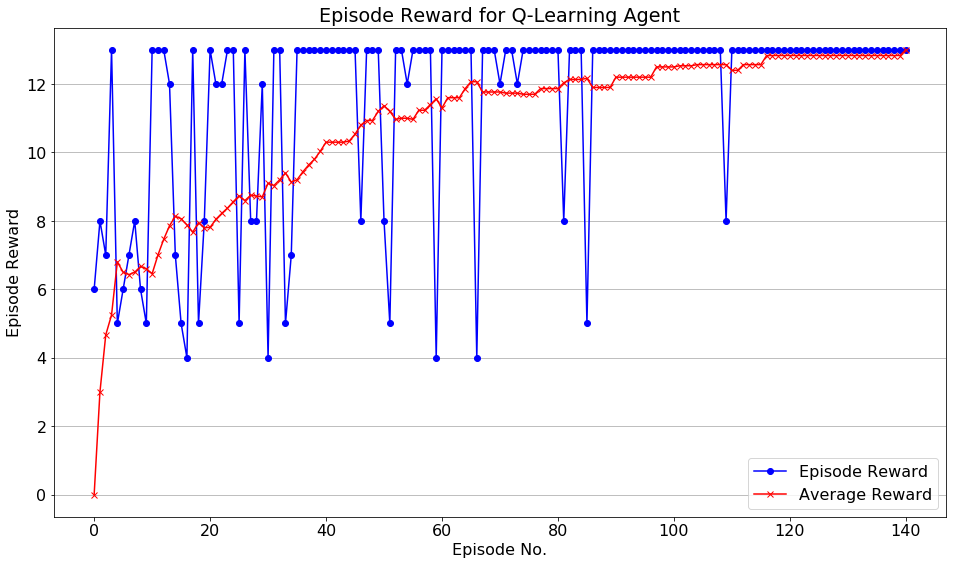

In [256]:
plt.figure(figsize=(16,9))
plt.rc('font', size=16) 
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

plt.title("Episode Reward for Q-Learning Agent")
#plt.bar(np.arange(len(rewards)), rewards, alpha=0.6, color='green', width=5)
plt.plot(np.arange(len(cum_rewards)), cum_rewards, 'o-b')
plt.plot(np.arange(len(avg_rewards)), avg_rewards, 'x-r')
plt.grid(axis='y')
plt.xlabel('Episode No.')
plt.ylabel('Episode Reward')
plt.legend(['Episode Reward', 'Average Reward'])
plt.savefig('png/q_agent_mdp.png')
plt.show()

In [263]:
print ('Q-Table=')
print (Q)

print ("Percent of episodes finished successfully: {0}".format(sum(cum_rewards)/nb_episodes))
print ("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(cum_rewards[-100:])/100))

print ("Average number of steps: %.2f" % (sum(steps)/nb_episodes))
print ("Average number of steps (last 100 episodes): %.2f" % (sum(steps[-100:])/100))

Q-Table=
[[13. 12.]
 [ 5. 10.]
 [11.  5.]
 [ 3.  2.]
 [ 1.  9.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  0.]]
Percent of episodes finished successfully: 8.18
Percent of episodes finished successfully (last 100 episodes): 12.43
Average number of steps: 2.12
Average number of steps (last 100 episodes): 3.00


## Validate Q-Learning Results
To validate the training results, we can simulate the agent in the training environment. The agent successfully finds the optimal path which results in cumulative reward of 13.

In [270]:
state = 0
cum_reward = 0
states = [0]
done = False
for n in range(nb_steps):
    action = np.argmax(Q[state])
    
    for k in range(nb_states):
        if MDP_T[state][k][action] > 0:
            new_state = k
            reward = MDP_R[state][k][action]
        
    cum_reward += reward
        
    if new_state in [6,7]:
        done = True
        
    state = new_state
    states.append(state)
    if done:
        print ('Best solution=',states)
        print ('Cumulative Reward= %d' % cum_reward)
        break

Best solution= [0, 1, 4, 7]
Cumulative Reward= 13
